# Air Pollution
Pollution can be gas or liquid or solid. It can also be classified chemically, such as:- oxide, hydrocarbon, acid or other kinds. Pollution can also be classified by what makes it.

Many pollutants go into the air from natural sources. These pollutants include dust, sea salt, volcanic ashes and gases, smoke from forest fires, pollen, and many other materials.[1] In fact, there are many more natural pollutants than pollutants that humans make.[1] However, humans and other living things have adapted to most of these natural pollutants.[1]source https://simple.wikipedia.org/wiki/Air_pollution


# About the notebook

I am trying to practice Data Science field with the tools I recently learned that is Bigquery. Since the data is 3TB large I will work on it on cloud. 

In this notebook data is extracted from BigQuery Public Dataacessible in Kaggle. The BigQurey Helper Object will convert data in cloud storage into Pandas DataFrame object. The query syntax is same as SQL and it will also help to visualize the data easily.

> **BigQuery** is a RESTful web service that enables interactive analysis of massively large datasets working in conjunction with Google Storage. It is an Infrastructure as a Service that may be used complementarily with MapReduce.

Here, I will be analyzing OpenAQ dataset, which has some information about the air pollutants. 

**Measurement units**
       a.  ug/m3 : micro gram/cubic meter
       b.  ppm : Parts Per Million

**Pollutants**
    a. O3 : Ozone gas
    b. SO2 : Sulphur Dioxed
    c. NO2 : Nitrogen Dioxed
    d. PM2.5 : Particles with an aerodynamic diameter less than  2.5μm 
    e. PM10 : Particles with an aerodynamic diameter less than  10μm 
    f. CO : Carbon monoxide

So, let's dive in immediately and find out the results!

# Importing the liabraries

In [43]:
# uploading the basic datascience and big query liabraries 

import numpy as np 

import pandas as pd 

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows =10

import bq_helper

# google bigquery library for quering data
from google.cloud import bigquery

# BigQueryHelper for converting query result direct to dataframe
from bq_helper import BigQueryHelper

# EDA

**I will do exploratory data analysis and data visualizatiion **

In [44]:
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# import plotly
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins as plugins

%matplotlib inline

# exploring the dataset

Now, I will be creating a dataset and list down all the tables for this particular dataset.

In [45]:
# create a helper object for this dataset
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")


# print all the tables in this dataset (there's only one!)
open_aq.list_tables()

['global_air_quality']

In [46]:
#Schema 
open_aq.table_schema('global_air_quality')

[SchemaField('location', 'string', 'NULLABLE', 'Location where data was measured', ()),
 SchemaField('city', 'string', 'NULLABLE', 'City containing location', ()),
 SchemaField('country', 'string', 'NULLABLE', 'Country containing measurement in 2 letter ISO code', ()),
 SchemaField('pollutant', 'string', 'NULLABLE', 'Name of the Pollutant being measured. Allowed values: PM25, PM10, SO2, NO2, O3, CO, BC', ()),
 SchemaField('value', 'float', 'NULLABLE', 'Latest measured value for the pollutant', ()),
 SchemaField('timestamp', 'timestamp', 'NULLABLE', 'The datetime at which the pollutant was measured, in ISO 8601 format', ()),
 SchemaField('unit', 'string', 'NULLABLE', 'The unit the value was measured in coded by UCUM Code', ()),
 SchemaField('source_name', 'string', 'NULLABLE', 'Name of the source of the data', ()),
 SchemaField('latitude', 'float', 'NULLABLE', 'Latitude in decimal degrees. Precision >3 decimal points.', ()),
 SchemaField('longitude', 'float', 'NULLABLE', 'Longitude in d

There is only one table (**global_air_quality**) in the dataset **openaq**.

Next I will look into columns and the datatype of this table

### Display Table *global_air_quality*

In [47]:
# print the first couple rows of the "global_air_quality" dataset
open_aq.head("global_air_quality")


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


# Air Quality Index(AQI) : Over the Years
An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become.Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards.  source https://en.wikipedia.org/wiki/Air_quality_index

In [48]:
query_aqi = """
            SELECT EXTRACT(YEAR FROM timestamp) as `Year`,
                   AVG(value) as `Average`,
                   latitude,
                   longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit = 'µg/m³'
        GROUP BY Year, 
                 latitude,
                 longitude
        """
aqi = open_aq.query_to_pandas_safe(query_aqi)

aqi.head()

,Year,Average,latitude,longitude
0,2018,221.510,12.912811,77.609220
1,2018,263.530,12.938906,77.697270
2,2017,17.110,12.938906,77.697270
3,2018,445.295,12.977347,77.570694
4,2018,105.575,12.991670,77.545830



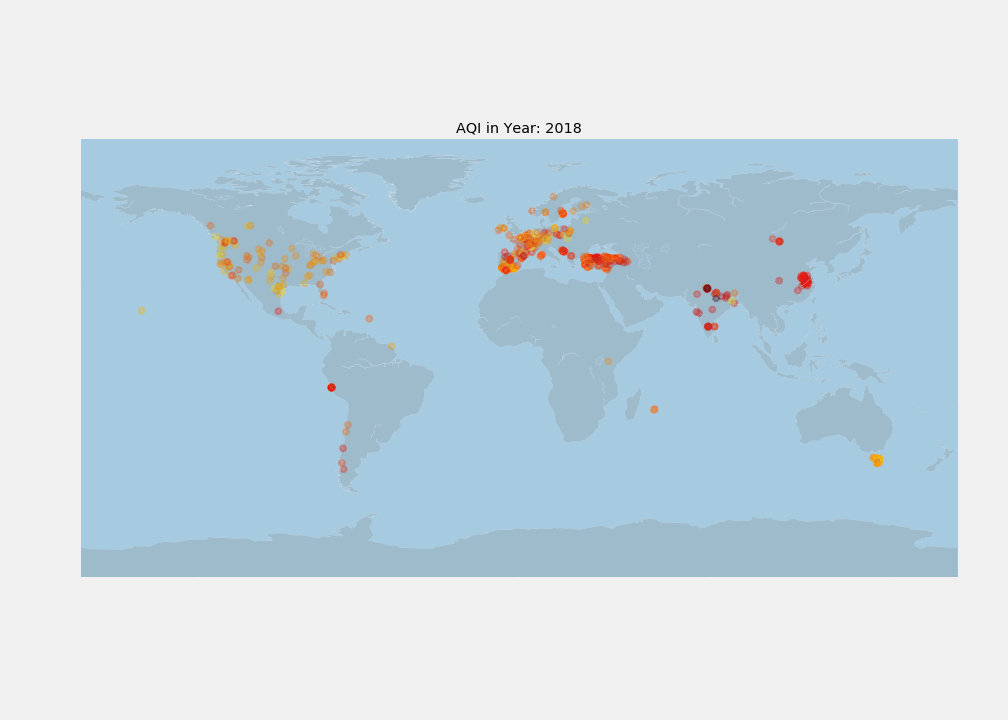

In [79]:
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(14,10))
plt.style.use('ggplot')

def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('AQI in years: '+str(Year))
    m4 = Basemap(llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,projection='cyl')
    m4.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m4.fillcontinents(color='grey', alpha=0.2)
    m4.drawcoastlines(linewidth=0.1, color="white")
    m4.shadedrelief()
    
    lat_y = list(aqi[aqi['Year'] == Year]['latitude'])
    lon_y = list(aqi[aqi['Year'] == Year]['longitude'])
    lat,lon = m4(lat_y,lon_y) 
    avg = np.log(aqi[aqi['Year'] == Year]['Average'])
    m4.scatter(lon,lat,c = avg,lw=2, alpha=0.3,cmap='hot_r')
   
ani = animation.FuncAnimation(fig,animate,list(aqi['Year'].unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

From the map it is visilbe the no of countries will be effected due to air pollution are increasing.
Now,I will look into the countries listed in the AQI.

# Listed Countries in Air Quality Index (AQI)

In [50]:
query = """SELECT country,COUNT(country) as `count`
    FROM `bigquery-public-data.openaq.global_air_quality`
    GROUP BY country
    HAVING COUNT(country) >10
    ORDER BY `count` DESC
    """
cnt = open_aq.query_to_pandas_safe(query)

cnt.head(20)

,country,count
0,CN,4961
1,US,3674
2,ES,2114
3,FR,1595
4,IN,1452
...,...,...
15,IT,328
16,CZ,323
17,NL,279
18,IL,256


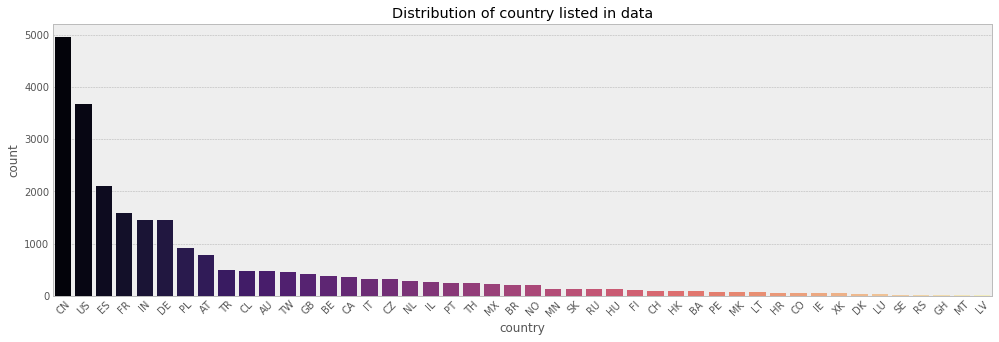

In [51]:
plt.style.use('bmh')
plt.figure(figsize=(15,5))
sns.barplot(cnt['country'], cnt['count'], palette='magma')
plt.xticks(rotation=45)
plt.title('Distribution of country listed in data');

# Locations

Shown below are some locations where average AQI reports to be the maximum.

Other locations in World Map are also shown below.

In [52]:
query = """SELECT city,latitude,longitude,averaged_over_in_hours,
            AVG(value) as `Average`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit = 'µg/m³'
            GROUP BY latitude,city,longitude,averaged_over_in_hours   
            ORDER BY Average DESC
            """
location = open_aq.query_to_pandas_safe(query)
location.dropna(axis=0, inplace=True)
location.head(10)

,city,latitude,longitude,averaged_over_in_hours,Average
0,Bitola Municipality,41.030280,21.336670,1.0,6.440571e+10
2,Satna,24.590826,80.857430,1.0,2.007075e+04
3,Delhi,28.667086,77.130130,1.0,8.417833e+03
4,Toledo,39.868060,-4.020830,1.0,8.348500e+03
5,Delhi,28.652740,77.297790,1.0,3.426667e+03
6,Zonguldak,41.276466,31.433418,1.0,3.226400e+03
9,Muğla,37.311210,27.782932,1.0,1.872200e+03
12,Salamanca,40.979168,-5.665278,1.0,1.206750e+03
13,Kocaeli,40.788730,29.537188,1.0,1.163600e+03
14,Roma,41.864193,12.469531,1.0,1.101000e+03


We can see that Indian cities are holding the topmost places in the leaderboard.
But, there are many other places in the dataset which are also not lagging.
We can see those places in the map below.

# AQI Value Distribution on map

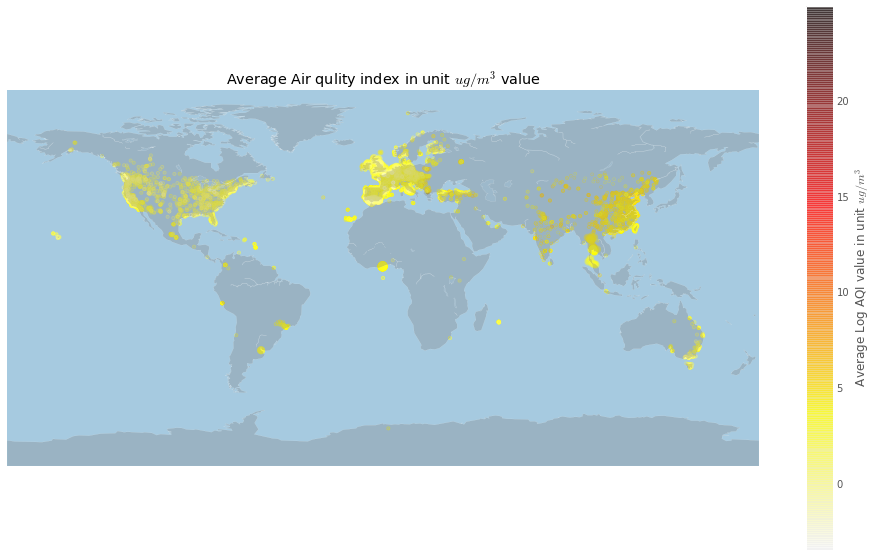

In [53]:
plt.style.use('ggplot')
f,ax = plt.subplots(figsize=(15,10))
m1 = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90, urcrnrlat=90,
            resolution='c',lat_ts=True)

m1.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m1.fillcontinents(color='grey', alpha=0.3)
m1.drawcoastlines(linewidth=0.1, color="white")
m1.shadedrelief()

hour = location['averaged_over_in_hours']
avg = np.log(location['Average'])
m1loc = m1(location['latitude'].tolist(),location['longitude'])
m1.scatter(m1loc[1],m1loc[0],lw=3,alpha=0.5,cmap='hot_r',\
          c=avg,s=hour)
plt.title('Average Air qulity index in unit $ug/m^3$ value')
plt.colorbar(label=' Average Log AQI value in unit $ug/m^3$');

So, we can see that the pollution level in different places are at an alarming condition. The European countries(topping the list, USA,South and South-East Asian conutries are making more pollution, where as Australia, Africa and South Africa do not make up to the topper's list.

# AQI distribuation in Netherlands
## since I am interested in exploring the AQI distribution of various cities in Netherlands.
I will filter the data on NL

In [54]:
#NL location
query = """SELECT 
            MAX(latitude) as `max_lat`,
            MIN(latitude) as `min_lat`,
            MAX(longitude) as `max_lon`,
            MIN(longitude) as `min_lon`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'NL' 
        """
nl_loc = open_aq.query_to_pandas_safe(query)
nl_loc

,max_lat,min_lat,max_lon,min_lon
0,53.3304,50.8459,6.93243,3.74948


In [55]:
query = """ SELECT city,latitude,longitude,averaged_over_in_hours,
            AVG(value) as `Average`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'NL' AND unit = 'µg/m³'
            GROUP BY latitude,city,longitude,averaged_over_in_hours,country
            ORDER BY Average DESC
        """

nl_aqi = open_aq.query_to_pandas_safe(query)
nl_aqi.head()

,city,latitude,longitude,averaged_over_in_hours,Average
0,Wieringerwerf,52.8037,5.05051,1.0,55.045
1,Haarlem,52.3705,4.64232,1.0,38.135
2,Den Haag,52.0390,4.35938,1.0,37.680
3,Breda,51.5935,4.82494,1.0,37.640
4,Breukelen,52.2015,4.98744,1.0,36.870


Text(0.5,1,'Average Air qulity index in unit $ug/m^3$ of NL')

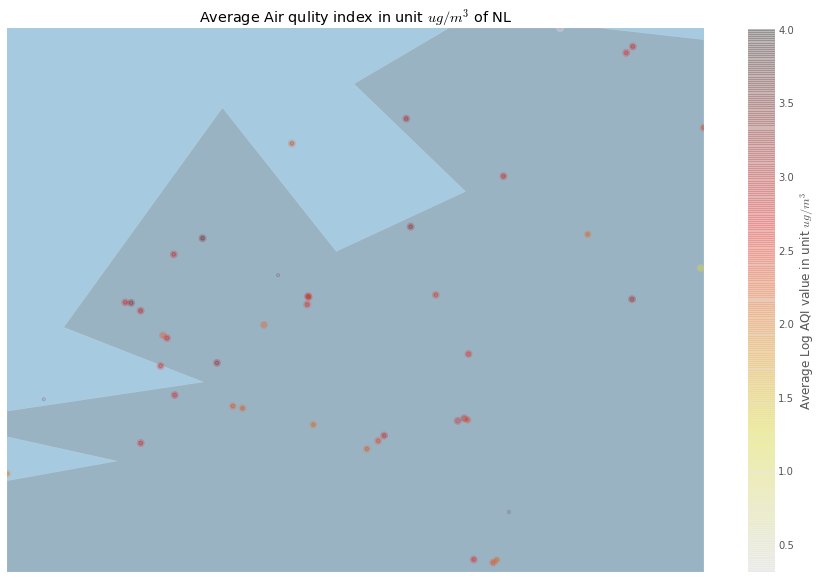

In [56]:
# NL
min_lat = nl_loc['min_lat']
max_lat = nl_loc['max_lat']
min_lon = nl_loc['min_lon']
max_lon = nl_loc['max_lon']

plt.figure(figsize=(14,10))
m2 = Basemap(projection='cyl', llcrnrlon=min_lon, urcrnrlon=max_lon, llcrnrlat=min_lat, urcrnrlat=max_lat,
            resolution='c',lat_ts=True)
m2.drawcounties()
m2.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m2.fillcontinents(color='grey', alpha=0.3)
m2.drawcoastlines(linewidth=0.1, color="white")
m2.drawstates()
avg = np.log((nl_aqi['Average']))
h = nl_aqi['averaged_over_in_hours']
m2loc = m2(nl_aqi['latitude'].tolist(),nl_aqi['longitude'])
m2.scatter(m2loc[1],m2loc[0],s = h,c = avg,lw=3,alpha=0.2,zorder=3,cmap='hot_r')
plt.colorbar(label = 'Average Log AQI value in unit $ug/m^3$')
plt.title('Average Air qulity index in unit $ug/m^3$ of NL')

In [57]:
#INDIA location
query = """SELECT 
            MAX(latitude) as `max_lat`,
            MIN(latitude) as `min_lat`,
            MAX(longitude) as `max_lon`,
            MIN(longitude) as `min_lon`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'IN' """
in_loc = open_aq.query_to_pandas_safe(query)
in_loc

,max_lat,min_lat,max_lon,min_lon
0,31.62,8.51491,91.8985,72.59191


In [58]:
query = """ SELECT city,latitude,longitude,averaged_over_in_hours,
            AVG(value) as `Average`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'IN' AND unit = 'µg/m³'
            GROUP BY latitude,city,longitude,averaged_over_in_hours,country """
in_aqi = open_aq.query_to_pandas_safe(query)
in_aqi

,city,latitude,longitude,averaged_over_in_hours,Average
0,Bengaluru,12.912811,77.609220,0.25,221.510000
1,Bengaluru,12.938906,77.697270,0.25,214.246000
2,Bengaluru,12.977347,77.570694,0.25,445.295000
3,Bengaluru,12.991670,77.545830,0.25,105.575000
4,Chennai,12.992514,80.237450,0.25,190.764000
...,...,...,...,...,...
261,Delhi,28.815329,77.153010,0.25,176.750000
262,Delhi,28.822836,77.101980,0.25,130.416667
263,Delhi,28.650800,77.315200,NaN,1300.000000
264,Delhi,28.652740,77.297790,1.00,3426.666667


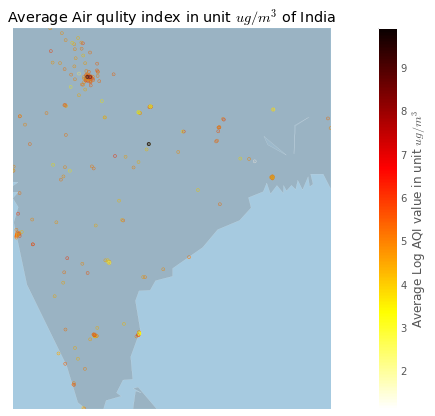

In [59]:
# INDIA
min_lat = in_loc['min_lat']
max_lat = in_loc['max_lat']
min_lon = in_loc['min_lon']
max_lon = in_loc['max_lon']

plt.figure(figsize=(15,7))
m3 = Basemap(projection='cyl', llcrnrlon=min_lon, urcrnrlon=max_lon, llcrnrlat=min_lat, urcrnrlat=max_lat,
            resolution='c',lat_ts=True)
m3.drawcounties()
m3.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m3.fillcontinents(color='grey', alpha=0.3)
m3.drawcoastlines(linewidth=0.1, color="white")
m3.drawstates()
avg = np.log((in_aqi['Average']))
h = in_aqi['averaged_over_in_hours']
m3loc = m3(in_aqi['latitude'].tolist(),in_aqi['longitude'])
m3.scatter(m3loc[1],m3loc[0],s = h,c = avg,lw=3,alpha=1,cmap='hot_r')
plt.colorbar(label = 'Average Log AQI value in unit $ug/m^3$')
plt.title('Average Air qulity index in unit $ug/m^3$ of India');

# Source_name to the corresponding country

In the dataset,that there is an attribute called 'source_name'. This attribute points to the source which provides the pollution data for a particular country.
So, let's find out the different source names and their corresponding reporting countries. 

In [60]:
query_source = """
                    SELECT 
                    DISTINCT source_name, 
                             country
                    FROM `bigquery-public-data.openaq.global_air_quality`
                    ORDER BY source_name
                    """

source = open_aq.query_to_pandas_safe(query_source)

source.head(10)

,source_name,country
0,ARPALAZIO,IT
1,Agaar.mn,MN
2,AirNow,CL
3,AirNow,AU
4,AirNow,ID
5,AirNow,UG
6,AirNow,VM
7,AirNow,GT
8,AirNow,BM
9,AirNow,IN


So, listed above are some of the countries along with their source providers. 
For example, AirNow provides **Air Quality Reports **for countries like Australia (AU), United States (US), Chile (CL), Mexico (MX) and Canada (CA), to be named a few. 

Now, we will be checking country count per source in the below query.

In [61]:
query_country_count_per_source = """
                    SELECT 
                    DISTINCT source_name,
                    COUNT(country) AS Country_Count
                    FROM `bigquery-public-data.openaq.global_air_quality`
                    GROUP BY source_name
                    HAVING Country_Count > 50
                    ORDER BY Country_Count DESC
                    """
# Country_Count > 50 (Ignoring the negligible values)
country_count_per_source = open_aq.query_to_pandas_safe(query_country_count_per_source)

country_count_per_source.head(10)

,source_name,Country_Count
0,ChinaAQIData,4710
1,AirNow,4220
2,EEA Spain,1962
3,EEA France,1595
4,EEA Germany,1449
5,caaqm,1246
6,GIOS,856
7,EEA Austria,781
8,Turkey,496
9,Chile - SINCA,466


According to the data produced above, we will now plot a graph to find out the leading sources(in terms of number of countries) to provide the **Air Quality Data/Pollution Report**.

# Graph Plot

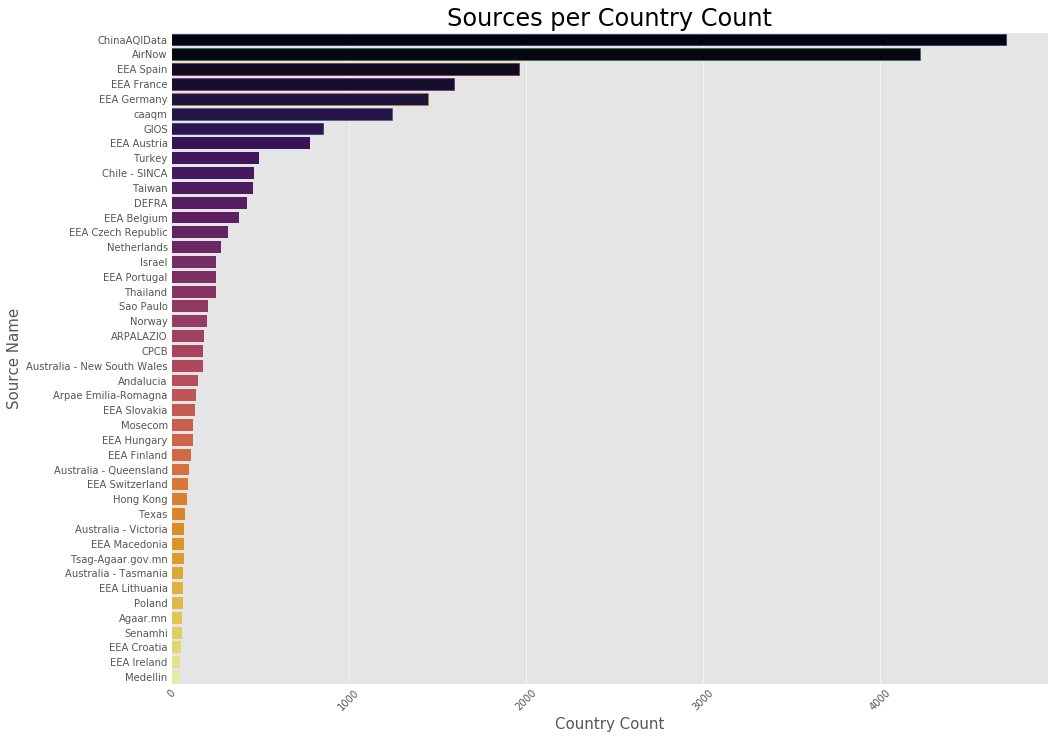

In [62]:
plt.subplots(figsize=(14,12))
sns.barplot(x='Country_Count',y='source_name',data=country_count_per_source,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Source Name', fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel('Country Count', fontsize=15)
plt.title('Sources per Country Count', fontsize=24)
plt.savefig('sources_per_country_count.png')
plt.show()

Here, we can see that sources like **AirNow**, **EEA France**, **EEA Spain**, **EEA Germany**, **EEA Austria**, **EEA Czech Republic** tops the leaderboard.

So, for our further analysis, we will consider the pollutant data from the above stated sources.

Hence, the next step will be to identify the different pollutants.

# Exploring different pollutants

In [63]:
query_pollutants = """
                    SELECT 
                    DISTINCT pollutant, unit
                    FROM `bigquery-public-data.openaq.global_air_quality`
                    WHERE source_name IN ('AirNow', 'EEA France', 'EEA Spain', 'EEA Germany', 'EEA Austria', 'EEA Czech Republic','Netherlands')
                    ORDER BY pollutant
                    """

pollutants = open_aq.query_to_pandas_safe(query_pollutants)

pollutants.head(15)

,pollutant,unit
0,bc,µg/m³
1,co,ppm
2,co,µg/m³
3,no2,ppm
4,no2,µg/m³
...,...,...
6,o3,µg/m³
7,pm10,µg/m³
8,pm25,µg/m³
9,so2,ppm


So, the noted pollutants are:

*  Black Carbon
*  Carbon Monoxide
*  Nitrogen Dioxide
*  Ozone
*  Sulphur Dioxide
*  pm10
*  pm25

Hence, we will be focusing more on these pollutants now.

# Black Carbon 

**Black carbon** is the **sooty black material **emitted from gas and diesel engines, coal-fired power plants, and other sources that burn fossil fuel. It comprises a significant portion of particulate matter or PM, which is an air pollutant.

**Black Carbon (BC) **has recently emerged as a major contributor to global climate change, possibly second only to CO2 as the main driver of change. BC particles strongly absorb sunlight and give soot its black color. BC is produced both naturally and by human activities as a result of the incomplete combustion of fossil fuels, biofuels, and biomass. Primary sources include emissions from diesel engines, cook stoves, wood burning and forest fires. Reducing CO2 emissions is essential to avert the worst impacts of future climate change, but CO2 has such a long atmospheric lifetime that it will take several decades for CO2 concentrations to begin to stabilize after emissions reductions begin. In contrast, BC remains in the atmosphere for only a few weeks, so cutting its emissions would immediately reduce the rate of warming, particularly in the rapidly changing Arctic. Moreover, reduced exposure to BC provides public health co-benefits, especially in developing countries. Technologies that can reduce global BC emissions are available today.

# Analysis
## (µg/m³)

In [64]:
query_bc = """
    SELECT country, 
           source_name,
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'bc'
      AND unit = 'µg/m³'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

bc = open_aq.query_to_pandas_safe(query_bc)

bc.head(10)

,country,source_name,Avg_Value
0,US,AirNow,0.561250
1,PL,GIOS,0.743303


As per **AirNow**(as mentioned in the dataset), **US**  and **PL** are the only country which produces **Black Carbon**
Hence, no graph plot could be produced.

# Carbon Monoxide 

**Carbon monoxide**, also known as CO, is called the "**Invisible Killer**" because it's a colorless, odorless, poisonous gas. More than 150 people in the Unites States die every year(not only in US, but also in other countries) from accidental non-fire related CO poisoning associated with consumer products, including generators. Other products include faulty, improperly-used or incorrectly-vented fuel-burning appliances such as furnaces, stoves, water heaters and fireplaces.

# Analysis - I
## (µg/m³)

In [65]:
query_co = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'co'
      AND unit = 'µg/m³'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

co = open_aq.query_to_pandas_safe(query_co)

co.head(10)

,country,Avg_Value
0,TR,-4056.627231
1,NL,-898.177099
2,IE,0.214761
3,LV,0.280000
4,LT,0.924892
5,BE,2.313000
6,DK,131.428571
7,MN,164.090909
8,LU,190.000000
9,AD,200.000000


The query produced some country names above which has CO gas values (in µg/m³), and the graphical representation is shown below:

# Graph Plot

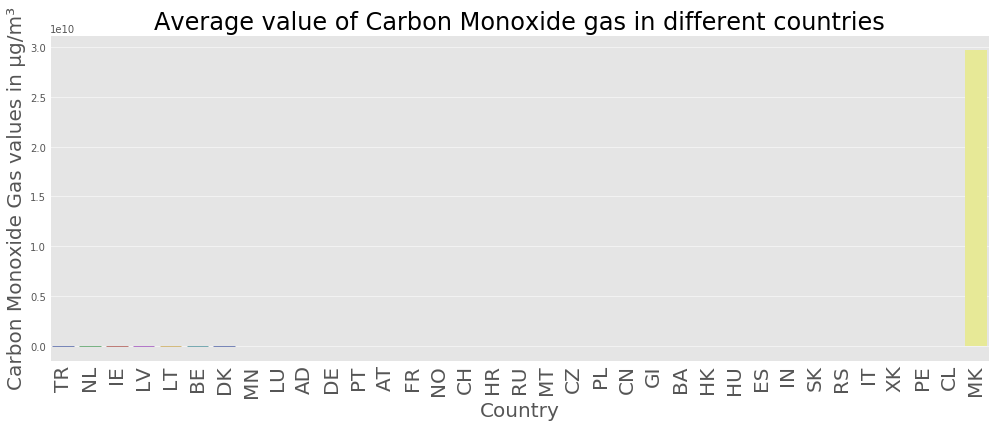

In [66]:
plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='Avg_Value',data=co,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Carbon Monoxide Gas values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Carbon Monoxide gas in different countries', fontsize=24)
plt.savefig('avg_co.png')
plt.show()

The above plot shows Turky(TR) and Netherlands(NL) have the most negative gas values in µg/m³ (which indicates less pollution), whereas Maxico (MK) tops the list.

# Carbon Monoxide : Analysis - II
## (ppm)

In [67]:
query_co_ppm = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'co'
      AND unit = 'ppm'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

co_ppm = open_aq.query_to_pandas_safe(query_co_ppm)

co_ppm.head(10)

,country,Avg_Value
0,CO,-6665.819046
1,ZA,0.060000
2,AU,0.066667
3,AU,0.100000
4,AU,0.130000
5,AU,0.145556
6,US,0.171429
7,AU,0.190000
8,AU,0.300000
9,TW,0.309605


The query produced some country names above which has CO gas values (in ppm), and the graphical representation is shown below:

# Graph Plot

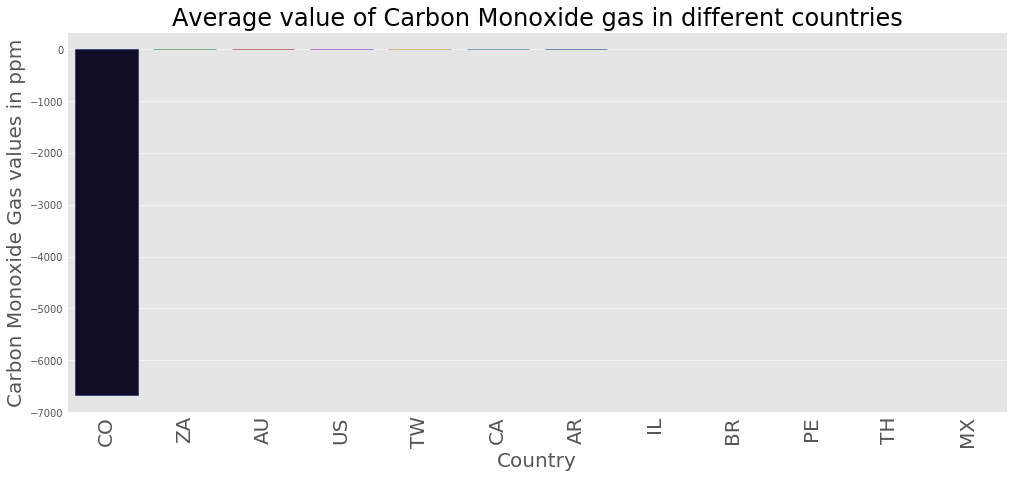

In [68]:
plt.subplots(figsize=(15,7))
sns.barplot(x='country',y='Avg_Value',data=co_ppm,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Carbon Monoxide Gas values in ppm', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Carbon Monoxide gas in different countries', fontsize=24)
plt.savefig('avg_co_ppm.png')
plt.show()

The above plot shows Columbia(CO) has negative value of carbon monooxide, Australia(AU) is at the verge of 0 and Maxico tops the list. 

# Nitrogen Dioxide : Analysis I
## (µg/m³)

In [69]:
query_no2 = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'no2'
      AND unit = 'µg/m³'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

no2 = open_aq.query_to_pandas_safe(query_no2)

no2.head(5)

,country,Avg_Value
0,NL,-471.335443
1,DE,7.487995
2,DK,8.181429
3,BE,8.250000
4,FI,9.750868


# Graph Plot

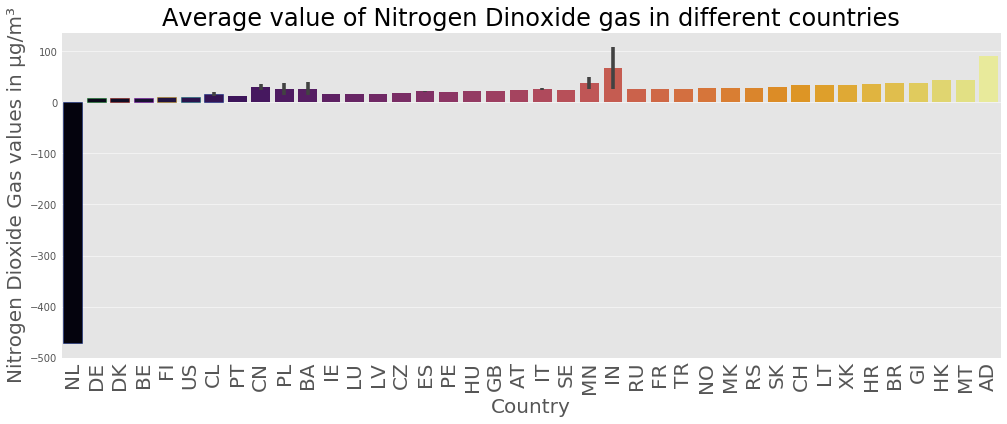

In [70]:
plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='Avg_Value',data=no2,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Nitrogen Dioxide Gas values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Nitrogen Dinoxide gas in different countries', fontsize=24)
plt.savefig('avg_no2.png')
plt.show()

# Nitrogen Dioxide : Analysis II
## (ppm)

In [71]:
query_no2_ppm = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'no2'
      AND unit = 'ppm'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

no2_ppm = open_aq.query_to_pandas_safe(query_no2_ppm)

no2_ppm.head(5)

,country,Avg_Value
0,CO,-2856.847285
1,AU,-1052.522263
2,AU,0.001333
3,AU,0.001500
4,US,0.003009


# Graph Plot

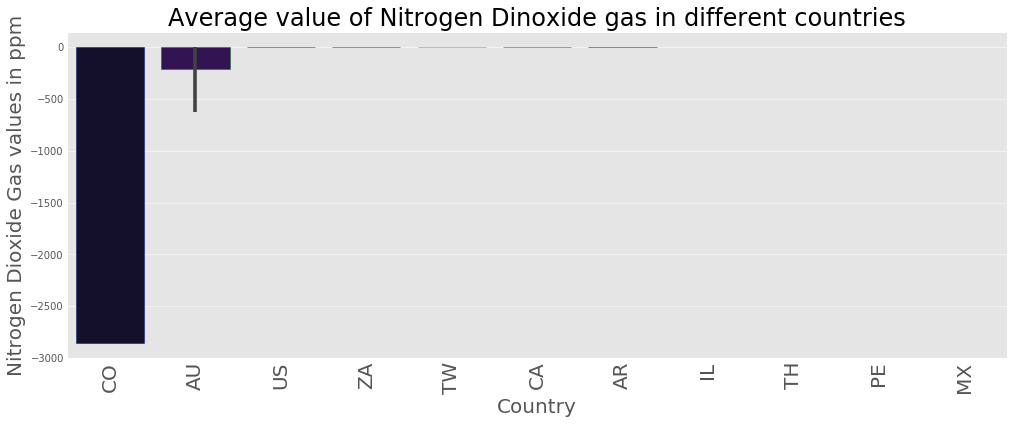

In [72]:
plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='Avg_Value',data=no2_ppm,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Nitrogen Dioxide Gas values in ppm', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Nitrogen Dinoxide gas in different countries', fontsize=24)
plt.savefig('avg_no2_ppm.png')
plt.show()

# Ozone : Analysis I
## (µg/m³)

In [73]:
query_o3 = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'o3'
      AND unit = 'µg/m³'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

o3 = open_aq.query_to_pandas_safe(query_o3)

o3.head(10)

,country,Avg_Value
0,NL,-290.217143
1,BA,7.120000
2,PE,11.045000
3,LT,11.482951
4,PL,13.583333
5,MK,18.440268
6,BA,19.000000
7,CN,23.000000
8,XK,23.117375
9,RS,23.195868


# Graph Plot

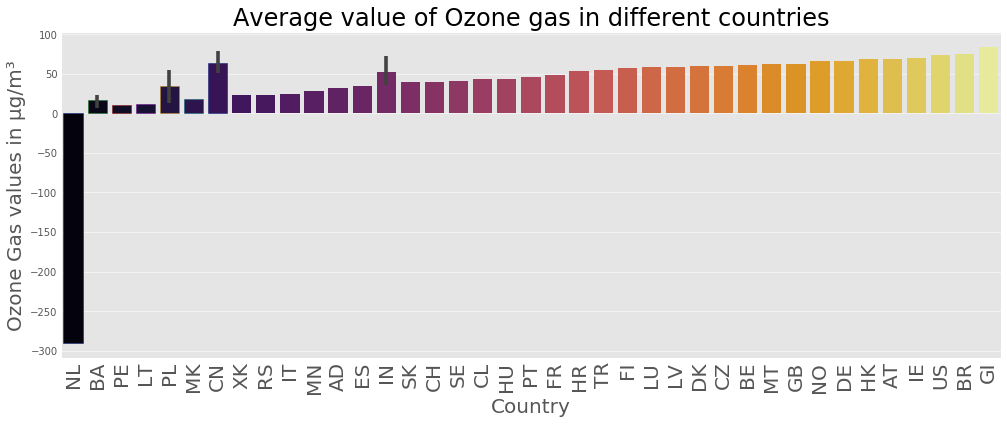

In [74]:
plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='Avg_Value',data=o3,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Ozone Gas values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Ozone gas in different countries', fontsize=24)
plt.savefig('avg_o3.png')
plt.show()

# Ozone : Analysis II
## (ppm)

In [75]:
query_o3_ppm = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'o3'
      AND unit = 'ppm'
      GROUP BY country, source_name
      ORDER BY Avg_Value ASC
        """

o3_ppm = open_aq.query_to_pandas_safe(query_o3_ppm)

o3_ppm.head(5)

,country,Avg_Value
0,CO,-2221.990000
1,AU,-1666.490917
2,CW,-0.999000
3,MM,0.001000
4,NP,0.002000


# Graph Plot

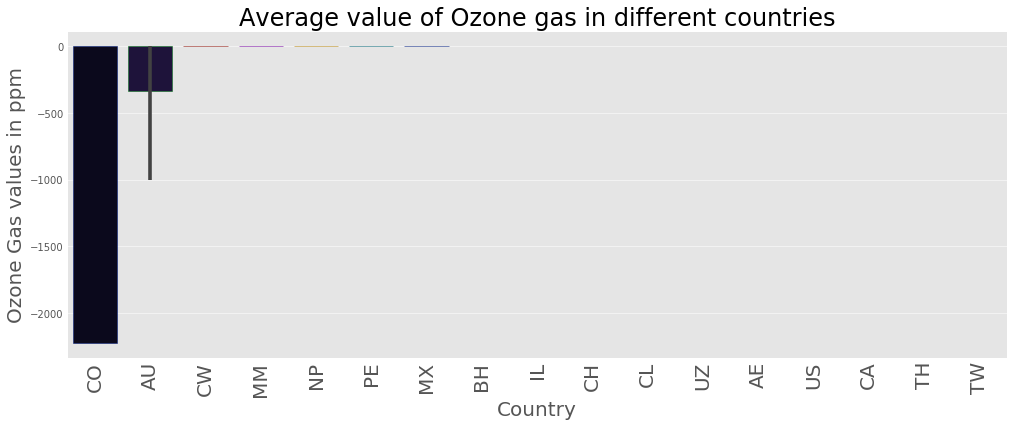

In [76]:
plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='Avg_Value',data=o3_ppm,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Ozone Gas values in ppm', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Ozone gas in different countries', fontsize=24)
plt.savefig('avg_o3_ppm.png')
plt.show()

next I will do the analysis of pollutants on country level. The countrywise dataset can be downloaded here(https://openaq.org/#/?_k=i1ibq1) for future analysis.